# Linear Regression

In [1]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [4]:
predict = "G3"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [5]:
#Split the data set into the train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [6]:
linear = linear_model.LinearRegression()

#Define the line of best fit
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.828988247818055


In [7]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [8]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [9]:
print('coefficient: \n', linear.coef_)
print('coefficient: \n', linear.intercept_)

coefficient: 
 [ 0.1522958   0.9847016  -0.19776118 -0.22129328  0.03933588]
coefficient: 
 -1.5412633676429301


In [10]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

10.782668786500201 [11 11  1  1  6] 10
9.483701323252351 [ 8 10  1  0  4] 10
12.062287715931287 [12 12  1  0  4] 13
3.53700337523611 [3 5 2 1 8] 5
9.590531740205744 [10 10  2  0  4] 10
8.796380013307806 [11  9  3  0 10] 10
9.285940141417804 [ 8 10  2  0  4] 9
9.590531740205744 [10 10  2  0  4] 11
14.965879423476487 [14 15  2  0  0] 15
8.610877845323024 [9 9 2 0 8] 9
9.211894954625986 [10 10  2  1  0] 0
12.69188462958549 [12 13  2  0  0] 14
-0.8252497531136599 [6 0 1 0 0] 0
6.060227213163005 [ 7  6  2  0 26] 6
9.107527493400019 [10 10  3  2  8] 10
14.257610758790896 [14 14  1  0  2] 13
15.349142773295817 [16 15  2  0  2] 15
12.218549413737993 [12 12  2  0 13] 13
4.057840554872219 [6 5 2 0 4] 6
16.362003036769348 [18 16  3  0  0] 16
14.026643208365536 [13 14  1  0  0] 14
13.679024510487514 [11 12  2  0 54] 11
14.01438419451577 [15 14  3  0  2] 15
10.28848209415063 [12 10  2  0 14] 11
14.336282509822286 [14 14  1  0  4] 14
9.364611892449194 [ 8 10  2  0  6] 10
7.719569968380075 [ 9  8  2 

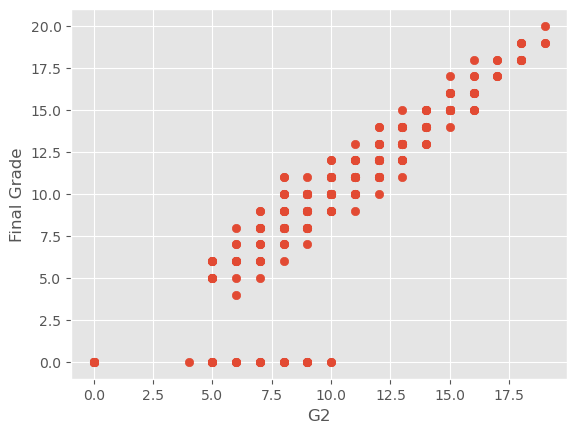

In [11]:
style.use("ggplot")

# set up scatter pyplo
p = "G2"
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()